In [1]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta

# Các sản phẩm
products = ["smartphone", "clothes", "laptops", "shoes", "books"]

# Các bình luận mẫu cho mỗi sản phẩm
comments = {
    "smartphone": [
        "This phone is amazing!",
        "I don't like the phone's battery life.",
        "The camera quality is bad.",
        "Good phone but a bit expensive.",
        "Phone is slow and not responsive."
    ],
    "clothes": [
        "The clothes are very comfortable.",
        "The material feels cheap.",
        "I love the design of this shirt!",
        "I don't like the fit, it's too tight.",
        "Good quality, but the color faded after wash."
    ],
    "laptops": [
        "This laptop is fast and reliable.",
        "The laptop is too heavy.",
        "Good value for money.",
        "The screen is not bright enough.",
        "Laptop heats up too quickly."
    ],
    "shoes": [
        "These shoes are super comfortable!",
        "The shoes look great but the sole is not durable.",
        "I love the design, but they're too tight.",
        "The shoes are too expensive for the quality.",
        "I wouldn't recommend these shoes."
    ],
    "books": [
        "Great book, very engaging.",
        "The plot was too predictable.",
        "I love the author's writing style.",
        "Didn't enjoy the book at all.",
        "The book was a bit boring."
    ]
}

# Sinh dữ liệu cho 500 người dùng, mỗi người dùng có 50 bình luận
num_users = 500
comments_data = []

for user_id in range(1, num_users + 1):
    for _ in range(50):  # Mỗi người dùng có 50 bình luận
        product = random.choice(products)
        comment = random.choice(comments[product])
        date = datetime.now() - timedelta(days=random.randint(0, 365))
        # Thêm dữ liệu vào danh sách
        comments_data.append([user_id, product, comment, date])

# Tạo DataFrame
df = pd.DataFrame(comments_data, columns=["UserID", "Product", "Comment", "Date"])
df.to_csv("user_comments.csv", index=False, encoding="utf-8")


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Chuyển bình luận thành vector sử dụng TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comment'])

# Label: Dựa trên nội dung bình luận phân loại là tích cực, tiêu cực hay trung tính
# Ví dụ:
y = df['Comment'].apply(lambda x: 1 if "good" in x or "amazing" in x or "love" in x else (0 if "bad" in x or "hate" in x else 2))

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Tạo và huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")


Accuracy: 1.0
MAE: 0.0
MSE: 0.0
MAPE: 0.0


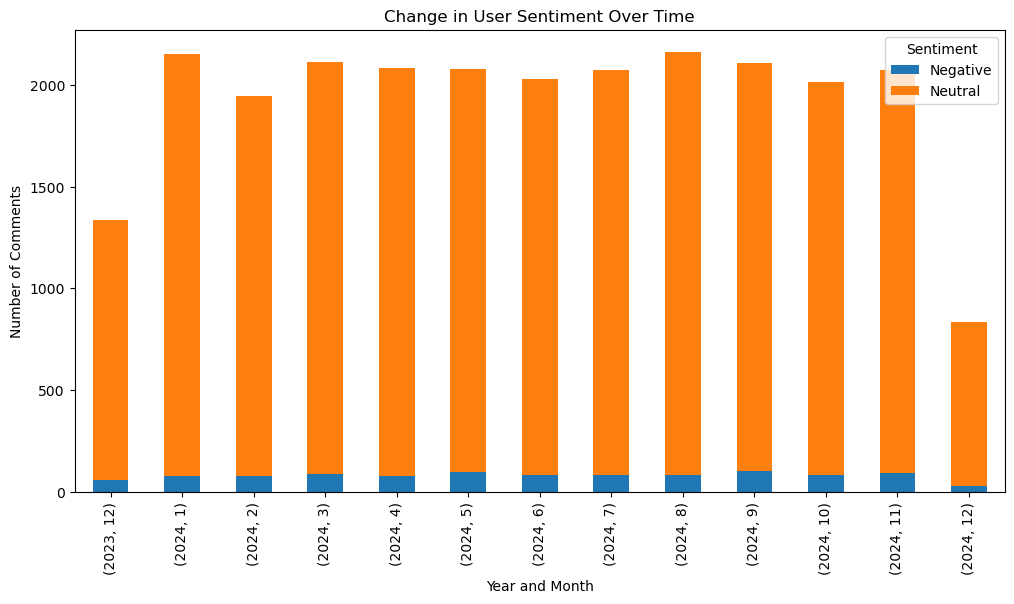

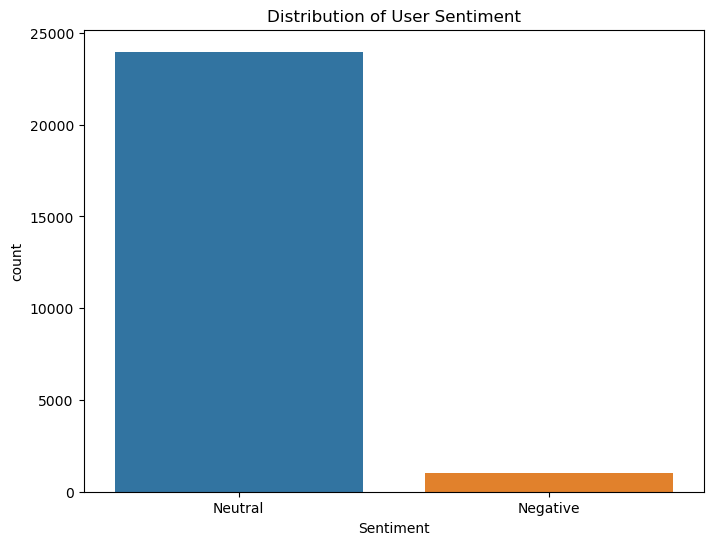

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ thay đổi sở thích người dùng theo thời gian
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Sentiment'] = df['Comment'].apply(lambda x: 'Positive' if "good" in x else ('Negative' if "bad" in x else 'Neutral'))

# Tính số lượng cảm xúc theo năm và tháng
sentiment_by_time = df.groupby(['Year', 'Month', 'Sentiment']).size().unstack(fill_value=0)

# Vẽ biểu đồ
sentiment_by_time.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Change in User Sentiment Over Time")
plt.xlabel("Year and Month")
plt.ylabel("Number of Comments")
plt.show()

# Biểu đồ phân phối sở thích của người dùng
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title("Distribution of User Sentiment")
plt.show()


Biểu đồ thay đổi sở thích người dùng theo thời gian: Biểu đồ này cho thấy sự thay đổi trong cảm xúc của người dùng (tích cực, tiêu cực, trung tính) theo tháng và năm.
Biểu đồ phân phối sở thích của người dùng: Biểu đồ này cho thấy phân bố tỷ lệ các sở thích của người dùng (tích cực, tiêu cực, trung tính) đối với các sản phẩm.